In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
try:
    data = pd.read_csv('/content/drive/MyDrive/machine learning/week 3/income.csv')
except FileNotFoundError:
    print("Error: File '/content/drive/MyDrive/machine learning/week 3/income.csv' not found. Please upload your dataset.")
    exit()

# Preprocessing: Convert categorical features to numerical using Label Encoding
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Pisahkan fitur (X) dan target (y)
X = data.drop('income', axis=1)
y = data['income']

# Bagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur (penting untuk k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluasi k-NN
print("Evaluasi k-NN:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluasi Decision Tree
print("\nEvaluasi Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Evaluasi k-NN:
[[3722  838  309   67]
 [1736  565  140   37]
 [ 648  150  638  126]
 [ 307   94  332   60]]
              precision    recall  f1-score   support

       <=50K       0.58      0.75      0.66      4936
      <=50K.       0.34      0.23      0.27      2478
        >50K       0.45      0.41      0.43      1562
       >50K.       0.21      0.08      0.11       793

    accuracy                           0.51      9769
   macro avg       0.39      0.37      0.37      9769
weighted avg       0.47      0.51      0.48      9769


Evaluasi Decision Tree:
[[2936 1395  401  204]
 [1299  863  199  117]
 [ 418  193  621  330]
 [ 198  131  296  168]]
              precision    recall  f1-score   support

       <=50K       0.61      0.59      0.60      4936
      <=50K.       0.33      0.35      0.34      2478
        >50K       0.41      0.40      0.40      1562
       >50K.       0.21      0.21      0.21       793

    accuracy                           0.47      9769
   macro avg 

Evaluasi k-NN:
[[3722  838  309   67]
 [1736  565  140   37]
 [ 648  150  638  126]
 [ 307   94  332   60]]
              precision    recall  f1-score   support

       <=50K       0.58      0.75      0.66      4936
      <=50K.       0.34      0.23      0.27      2478
        >50K       0.45      0.41      0.43      1562
       >50K.       0.21      0.08      0.11       793

    accuracy                           0.51      9769
   macro avg       0.39      0.37      0.37      9769
weighted avg       0.47      0.51      0.48      9769


Evaluasi Decision Tree:
[[2929 1409  393  205]
 [1285  876  207  110]
 [ 418  198  613  333]
 [ 192  135  298  168]]
              precision    recall  f1-score   support

       <=50K       0.61      0.59      0.60      4936
      <=50K.       0.33      0.35      0.34      2478
        >50K       0.41      0.39      0.40      1562
       >50K.       0.21      0.21      0.21       793

    accuracy                           0.47      9769
   macro avg 

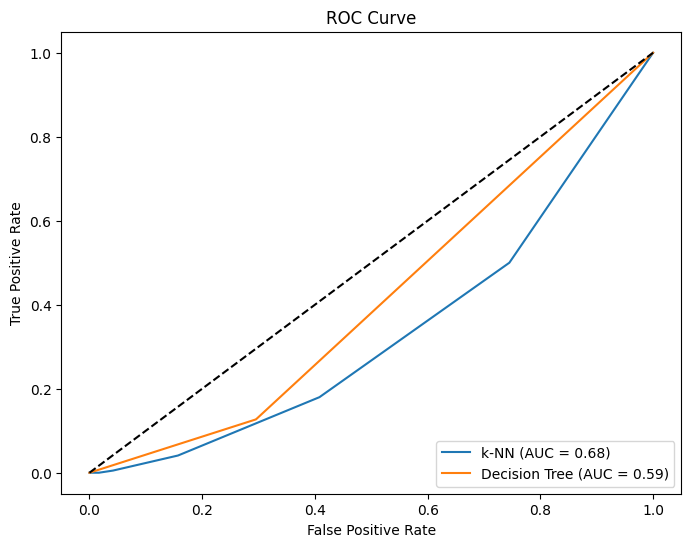

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
try:
    data = pd.read_csv('/content/drive/MyDrive/machine learning/week 3/income.csv')
except FileNotFoundError:
    print("Error: File '/content/drive/MyDrive/machine learning/week 3/income.csv' not found. Please upload your dataset.")
    exit()

# Preprocessing: Convert categorical features to numerical using Label Encoding
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Pisahkan fitur (X) dan target (y)
X = data.drop('income', axis=1)
y = data['income']

# Bagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur (penting untuk k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluasi k-NN
print("Evaluasi k-NN:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluasi Decision Tree
print("\nEvaluasi Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Bandingkan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC)

# Calculate ROC AUC for k-NN
y_prob_knn = knn.predict_proba(X_test) # Get probabilities for all classes
roc_auc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr') # Use probabilities for all classes

# Calculate ROC AUC for Decision Tree
y_prob_dt = dt.predict_proba(X_test) # Get probabilities for all classes
roc_auc_dt = roc_auc_score(y_test, y_prob_dt, multi_class='ovr') # Use probabilities for all classes

print("\nROC AUC k-NN:", roc_auc_knn)
print("ROC AUC Decision Tree:", roc_auc_dt)

# ROC Curve plotting
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn[:,1], pos_label='>50K') # Assuming '>50K' is the positive label
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt[:,1], pos_label='>50K') # Assuming '>50K' is the positive label


plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()